In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
data_G = xr.open_dataset('/Users/annadugoul/Documents/ERA5/ERA2')
data_G

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 41, time: 13248)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 25.5 25.25 25.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-16 12:50:36 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [7]:
de = data_G.z.resample(time='1D').mean()
daf = de.to_dataframe()
daf

z
time       latitude longitude              
2002-06-01 35.0     95.00      30567.568359
                    95.25      30602.716797
                    95.50      30598.578125
                    95.75      30562.958984
                    96.00      30543.626953
...                                     ...
2018-08-31 25.0     109.00     30646.587891
                    109.25     30654.205078
                    109.50     30657.492188
                    109.75     30667.921875
                    110.00     30673.810547

[14845936 rows x 1 columns]

In [8]:
daily = daf.reset_index()
daily

,time,latitude,longitude,z
0,2002-06-01,35.0,95.00,30567.568359
1,2002-06-01,35.0,95.25,30602.716797
2,2002-06-01,35.0,95.50,30598.578125
3,2002-06-01,35.0,95.75,30562.958984
4,2002-06-01,35.0,96.00,30543.626953
...,...,...,...,...
14845931,2018-08-31,25.0,109.00,30646.587891
14845932,2018-08-31,25.0,109.25,30654.205078
14845933,2018-08-31,25.0,109.50,30657.492188
14845934,2018-08-31,25.0,109.75,30667.921875


In [9]:
daily['MM'] = pd.DatetimeIndex(daily['time']).month
daily['YYYY'] = pd.DatetimeIndex(daily['time']).year
daily['DD'] = pd.DatetimeIndex(daily['time']).day
daily.columns = ['Date', 'Latitude', 'Longitude', 'Geopotential', 'MM', 'YYYY', 'DD']
daily

,Date,Latitude,Longitude,Geopotential,MM,YYYY,DD
0,2002-06-01,35.0,95.00,30567.568359,6,2002,1
1,2002-06-01,35.0,95.25,30602.716797,6,2002,1
2,2002-06-01,35.0,95.50,30598.578125,6,2002,1
3,2002-06-01,35.0,95.75,30562.958984,6,2002,1
4,2002-06-01,35.0,96.00,30543.626953,6,2002,1
...,...,...,...,...,...,...,...
14845931,2018-08-31,25.0,109.00,30646.587891,8,2018,31
14845932,2018-08-31,25.0,109.25,30654.205078,8,2018,31
14845933,2018-08-31,25.0,109.50,30657.492188,8,2018,31
14845934,2018-08-31,25.0,109.75,30667.921875,8,2018,31


In [10]:
Testie_ERA = daily.loc[((daily['YYYY'] == 2013) & (daily['MM'] == 7))]
Testie_ERA

,Date,Latitude,Longitude,Geopotential,MM,YYYY,DD
10124048,2013-07-01,35.0,95.00,29804.974609,7,2013,1
10124049,2013-07-01,35.0,95.25,29859.974609,7,2013,1
10124050,2013-07-01,35.0,95.50,29893.953125,7,2013,1
10124051,2013-07-01,35.0,95.75,29898.570312,7,2013,1
10124052,2013-07-01,35.0,96.00,29905.224609,7,2013,1
...,...,...,...,...,...,...,...
10201574,2013-07-31,25.0,109.00,30486.017578,7,2013,31
10201575,2013-07-31,25.0,109.25,30492.947266,7,2013,31
10201576,2013-07-31,25.0,109.50,30496.052734,7,2013,31
10201577,2013-07-31,25.0,109.75,30506.943359,7,2013,31


In [11]:
import glob
import os
import pandas as pd
import numpy as np

files_path = '/Users/annadugoul/Documents/SCData/SC5118'
read_files = glob.glob(os.path.join(files_path, "*.dat"))

np_array_values = []
for files in read_files:
    DailyP5118_data = pd.read_fwf(files, header=0)
    np_array_values.append(DailyP5118_data)
    DailyP5118_data.columns = ['YYYY', 'MM', 'DD', 'Pinmm']
    print(files)

/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56198.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56167.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56173.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56371.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56172.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56199.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57318.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57324.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56038.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57326.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56158.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57508.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56164.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56399.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56373.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56

In [12]:
np_array_values

[       YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    3.7
 24833  2018  12  28    7.0
 24834  2018  12  29 -999.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.4
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  29    0.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.0
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  

In [13]:
merge_values = np.vstack(np_array_values)
DailyP5118_data = pd.DataFrame(merge_values,
                columns=('YYYY', 'MM', 'DD', 'Pinmm'))
DailyP5118_data

,YYYY,MM,DD,Pinmm
0,1951.0,1.0,1.0,-999.0
1,1951.0,1.0,2.0,-999.0
2,1951.0,1.0,3.0,-999.0
3,1951.0,1.0,4.0,-999.0
4,1951.0,1.0,5.0,-999.0
...,...,...,...,...
3874567,2018.0,12.0,27.0,0.2
3874568,2018.0,12.0,28.0,0.3
3874569,2018.0,12.0,29.0,1.9
3874570,2018.0,12.0,30.0,0.0


In [14]:
import pandas as pd
import os

path = r'/Users/annadugoul/Documents/SCData/SC5118'
files = os.listdir(path)

DailyP5118_data = pd.DataFrame()

for file in files:
    df_station = pd.read_fwf(path + '//' + file)
    df_station['Station'] = file
    DailyP5118_data = DailyP5118_data.append(df_station)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station
0,1951,1,1,-999.0,DailyP5118_56198.dat
1,1951,1,2,-999.0,DailyP5118_56198.dat
2,1951,1,3,-999.0,DailyP5118_56198.dat
3,1951,1,4,-999.0,DailyP5118_56198.dat
4,1951,1,5,-999.0,DailyP5118_56198.dat
...,...,...,...,...,...
24832,2018,12,27,0.2,DailyP5118_57328.dat
24833,2018,12,28,0.3,DailyP5118_57328.dat
24834,2018,12,29,1.9,DailyP5118_57328.dat
24835,2018,12,30,0.0,DailyP5118_57328.dat


In [15]:
DailyP5118_data['Date'] = DailyP5118_data['DD'].map(str) + '/' + DailyP5118_data['MM'].map(str) + '/' + DailyP5118_data['YYYY'].map(str)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

DailyP5118_data['Month_Year'] = DailyP5118_data['MM'].map(str) + '/' + DailyP5118_data['YYYY'].map(str)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

cols_to_check = ['Station']
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'.dat':''}, regex=True)
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'DailyP5118_':''}, regex=True)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station,Date,Month_Year
0,1951,1,1,-999.0,56198,1/1/1951,1/1951
1,1951,1,2,-999.0,56198,2/1/1951,1/1951
2,1951,1,3,-999.0,56198,3/1/1951,1/1951
3,1951,1,4,-999.0,56198,4/1/1951,1/1951
4,1951,1,5,-999.0,56198,5/1/1951,1/1951
...,...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,27/12/2018,12/2018
24833,2018,12,28,0.3,57328,28/12/2018,12/2018
24834,2018,12,29,1.9,57328,29/12/2018,12/2018
24835,2018,12,30,0.0,57328,30/12/2018,12/2018


In [16]:
DailyP5118_data.replace(-999, np.nan, inplace=True)
DailyP5118_data.replace(-99.9, np.nan, inplace=True)
DailyP5118_data.replace(999, np.nan, inplace=True)

In [17]:
the_data = DailyP5118_data.drop(DailyP5118_data.index[0:17897])
station_data = pd.DataFrame(the_data)

In [18]:
station_data['Date'] = pd.to_datetime(station_data['Date'])
station_data = station_data.astype({"Station": np.int64})

In [19]:
stations_coord = pd.read_csv('/Users/annadugoul/Documents/SCData/CSV/Sta_SiChuan.csv')
station_data = pd.merge(station_data, stations_coord, on="Station")
station_data

,YYYY,MM,DD,Pinmm,Station,Date,Month_Year,Longitude,Latitude,Elevation
0,2000,1,1,0.0,56198,2000-01-01,1/2000,104.5,31.32,525.7
1,2000,1,2,0.0,56198,2000-02-01,1/2000,104.5,31.32,525.7
2,2000,1,3,0.0,56198,2000-03-01,1/2000,104.5,31.32,525.7
3,2000,1,4,0.0,56198,2000-04-01,1/2000,104.5,31.32,525.7
4,2000,1,5,0.0,56198,2000-05-01,1/2000,104.5,31.32,525.7
...,...,...,...,...,...,...,...,...,...,...
1082635,2018,12,27,0.2,57328,2018-12-27,12/2018,107.5,31.20,344.9
1082636,2018,12,28,0.3,57328,2018-12-28,12/2018,107.5,31.20,344.9
1082637,2018,12,29,1.9,57328,2018-12-29,12/2018,107.5,31.20,344.9
1082638,2018,12,30,0.0,57328,2018-12-30,12/2018,107.5,31.20,344.9


In [20]:
station_data.columns = ['YYYY', 'MM', 'DD', 'Pinmm', 'Station', 'Date', 'Month_Year', 'Longitude', 'Latitude', 'Elevation']
station_data

,YYYY,MM,DD,Pinmm,Station,Date,Month_Year,Longitude,Latitude,Elevation
0,2000,1,1,0.0,56198,2000-01-01,1/2000,104.5,31.32,525.7
1,2000,1,2,0.0,56198,2000-02-01,1/2000,104.5,31.32,525.7
2,2000,1,3,0.0,56198,2000-03-01,1/2000,104.5,31.32,525.7
3,2000,1,4,0.0,56198,2000-04-01,1/2000,104.5,31.32,525.7
4,2000,1,5,0.0,56198,2000-05-01,1/2000,104.5,31.32,525.7
...,...,...,...,...,...,...,...,...,...,...
1082635,2018,12,27,0.2,57328,2018-12-27,12/2018,107.5,31.20,344.9
1082636,2018,12,28,0.3,57328,2018-12-28,12/2018,107.5,31.20,344.9
1082637,2018,12,29,1.9,57328,2018-12-29,12/2018,107.5,31.20,344.9
1082638,2018,12,30,0.0,57328,2018-12-30,12/2018,107.5,31.20,344.9


In [21]:
station_data['Date'] = pd.to_datetime(station_data['Date'])
station_data = station_data.astype({"Station": np.int64})

In [22]:
Testie = station_data.loc[((station_data['YYYY'] == 2013) & (station_data['MM'] == 7))]
Testie

,YYYY,MM,DD,Pinmm,Station,Date,Month_Year,Longitude,Latitude,Elevation
4930,2013,7,1,44.0,56198,2013-01-07,7/2013,104.5,31.32,525.7
4931,2013,7,2,1.3,56198,2013-02-07,7/2013,104.5,31.32,525.7
4932,2013,7,3,10.0,56198,2013-03-07,7/2013,104.5,31.32,525.7
4933,2013,7,4,33.1,56198,2013-04-07,7/2013,104.5,31.32,525.7
4934,2013,7,5,0.2,56198,2013-05-07,7/2013,104.5,31.32,525.7
...,...,...,...,...,...,...,...,...,...,...
1080656,2013,7,27,0.0,57328,2013-07-27,7/2013,107.5,31.20,344.9
1080657,2013,7,28,0.0,57328,2013-07-28,7/2013,107.5,31.20,344.9
1080658,2013,7,29,0.0,57328,2013-07-29,7/2013,107.5,31.20,344.9
1080659,2013,7,30,0.0,57328,2013-07-30,7/2013,107.5,31.20,344.9


In [23]:
days = [4,5,6,7,8,9]

In [24]:
extent = [95,110,25,35]

In [26]:
Testie_ERA['Geopotential'].min()

29495.521

In [27]:
Testie_ERA['Geopotential'].max()

30989.807

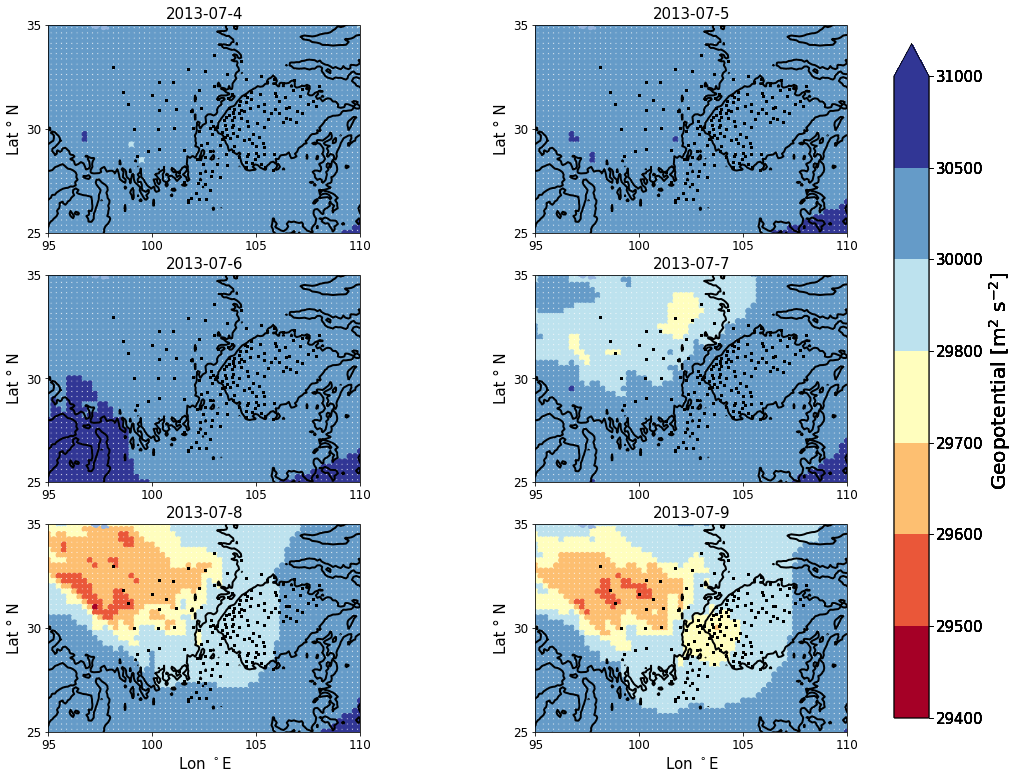

In [47]:
# DO NOT TOUCH THIS ONE
def plot_station_obs(Testie_ERA, days, extent,elevations,  out ):   
    """
    Creates subplots with all stations with precip record for specific days.

    Args:
        Testie_ERA(pd.DataFrame): pandas dataframe containing all data points for specific year and month of event
        days(list): list with days to plot
        extent(list): extent of map (minlon, maxlon, minlat, maxlat)
        xticks(list): xticks
        yticks(list): yticks
        elevations(xr.DataArray): elevation data
        out(str/path): output location and filename

    """

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.feature as cf
import matplotlib as mpl

data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude

elevations = data.elevation
out='/Users/annadugoul/Documents/Data_Thesis/ERA2_test.png'
fig = plt.figure(figsize= (16,13))

fs = 20

# precip colorbar norm
bounds=[29400,29500,29600,29700,29800,30000,30500,31000]
cmap = plt.cm.summer
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # days list
for dayidx in np.arange(len(days)):
        # select day
    day = days[dayidx]
    selected= Testie_ERA[Testie_ERA.DD == day]
        # only wet days
    selected = selected[selected.Geopotential >= 29275.30]
        # get number of rows (dependent on number of days)
    rows = int(len(days) / 2)
        # change the 2 if you want more than 2 columns
    ax = plt.subplot(rows, 2, dayidx +1 , projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.coastlines(color = 'black')
        # plot elevation data
    ax.contour(lon, lat, elevations.data, [3000], cmap = 'Greys_r', linewidths = [2.0])
    ax.contour(lon, lat, elevations.data, [800], cmap = 'Greys_r', linewidths = [2.0])
    m=ax.scatter(selected.Longitude.values, selected.Latitude.values, s=30, c= selected.Geopotential.values, cmap= 'RdYlBu', norm = norm)
    d=ax.scatter(Testie.Longitude.values, Testie.Latitude.values, s= 15, color = 'black', marker = '.')
    ax.coastlines()
    ax.add_feature(cf.LAKES)
    ax.add_feature(cf.OCEAN)
        # set axis ticks and labels
    xticks = list(np.arange(extent[0], extent[1]+5, 5))
    yticks = list(np.arange(extent[2], extent[3]+5, 5))

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize= 12)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize= 12)
    ax.set_ylabel('Lat ° N',  fontsize=15)
    if dayidx > 3:
        ax.set_xlabel('Lon $^\circ$E',  fontsize=15)
    ax.set_title(str(selected.YYYY.values[0])  + '-0' + str(selected.MM.values[0]) + '-' +str(selected.DD.values[0]), fontsize = 15)
        
    # precip colorbar norm
    cb_ax2 = fig.add_axes([0.90, 0.14,0.03, 0.72])
    cbar2 = fig.colorbar(m, cax=cb_ax2, extend= 'max')
    cbar2.outline.set_edgecolor('black')
    cbar2.ax.tick_params(labelsize=fs)
    cbar2.set_label(r'Geopotential [m$^{2}$ s$^{-2}$]', size=fs)
    cbar2.ax.tick_params(labelsize=15)
    plt.savefig(out, bbox_inches = 'tight', transparent = False, facecolor = 'white')

plt.show()